In [1]:
from pileup_correction import *

Welcome to JupyROOT 6.12/06


In [2]:
f = r.TFile("../truncationTest/data/results_1MissingFile_FullVsTrunc.root")

In [3]:
clusters = f.Get("clustersAndCoincidences").Get("clusters").Clone("clusters")

In [4]:
fileString = "_1MissingFile"
print("Creating files with:", fileString, "suffix")

Creating files with: _1MissingFile suffix


In [5]:
Ninitial = clusters.Project3D("yx").Clone()
Ninitial.Rebin2D(10,10)

<ROOT.TH2D object ("clusters_yx") at 0x7fffe2c13880>

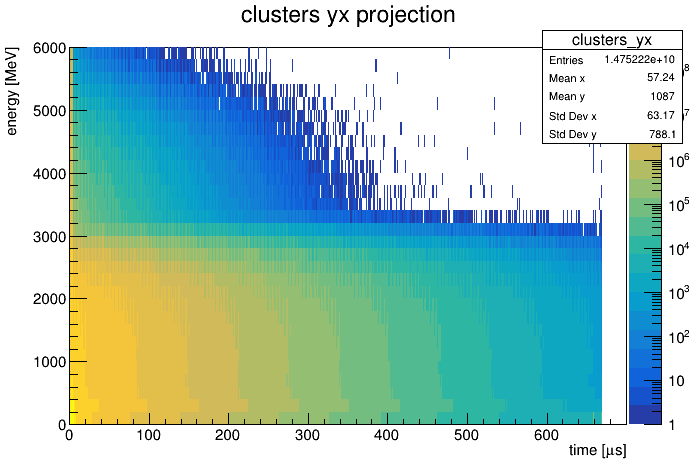

In [6]:
c = r.TCanvas()
Ninitial.Draw("colz")
c.SetLogz()
c.Draw()

In [7]:
corrector = PileupCorrector(Ninitial, "Test", 0, 2)

In [15]:
corrector.ComputeRhoDouble()

Computing rho_double histogram
All done


In [16]:
corrector.rhoDouble

<ROOT.TH2D object ("h_rhoDouble_0_Test") at 0x7fffe3f503a0>

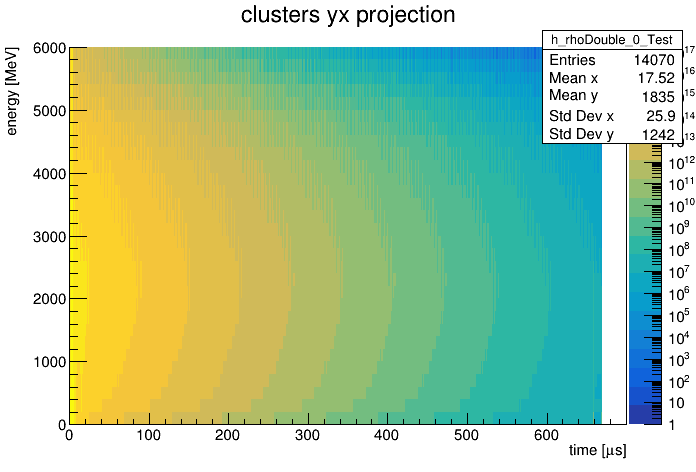

In [17]:
c = r.TCanvas()
corrector.rhoDouble.Draw("colz")
c.SetLogz()
c.Draw()

In [8]:
corrector.fitOptions = "REMB"
corrector.FullChain()

Running full pileup correction on input histogram.
Computing rho_double histogram
All done
Computing double pileup correction
Starting triple correction
Correction completed! Final histogram stored in h_pileupCorrected
 FCN=1.01697e+07 FROM MINOS     STATUS=SUCCESSFUL      2 CALLS          50 TOTAL
                     EDM=3.18744e-12    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           7.95033e-11   1.04712e-14   1.04712e-14  -2.41122e+08
 FCN=61824.8 FROM MINOS     STATUS=SUCCESSFUL      8 CALLS         152 TOTAL
                     EDM=5.43057e-13    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0          -4.65782e-11   4.10163e-14  -0.00000e+00   2.17164e+07
   2  p1          -3.21443e-2

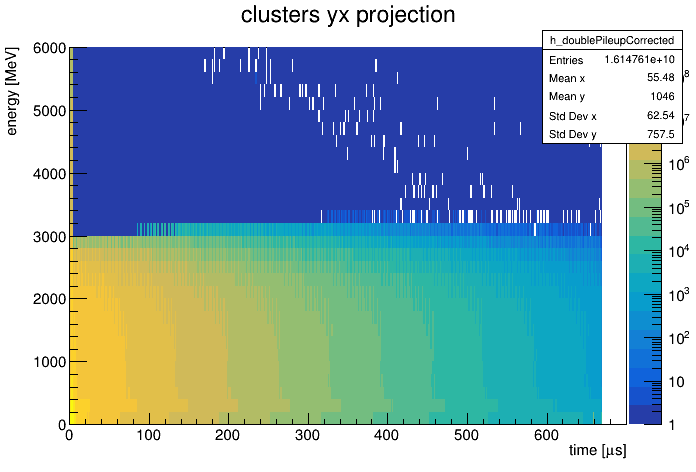

In [9]:
c = r.TCanvas()
corrector.h_doublePileupCorrected.Draw("colz")
c.SetLogz()
c.Draw()

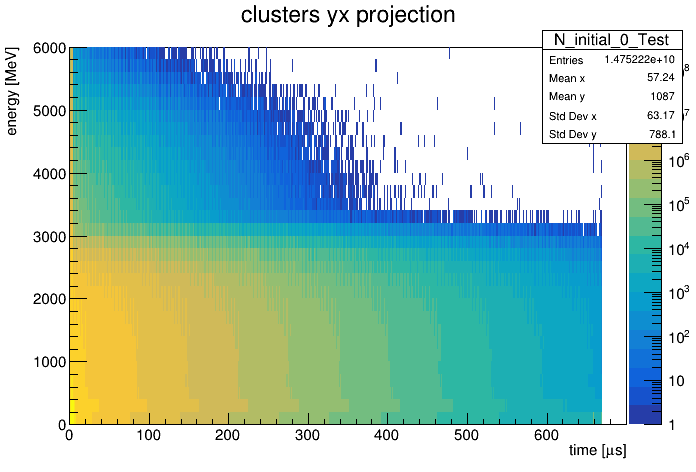

In [10]:
c = r.TCanvas()
corrector.h.Draw("colz")
c.SetLogz()
c.Draw()

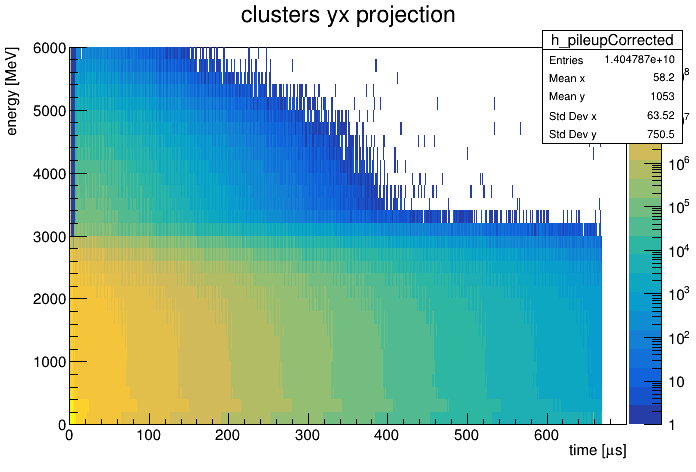

In [11]:
c = r.TCanvas()
corrector.h_pileupCorrected.Draw("colz")
c.SetLogz()
c.Draw()

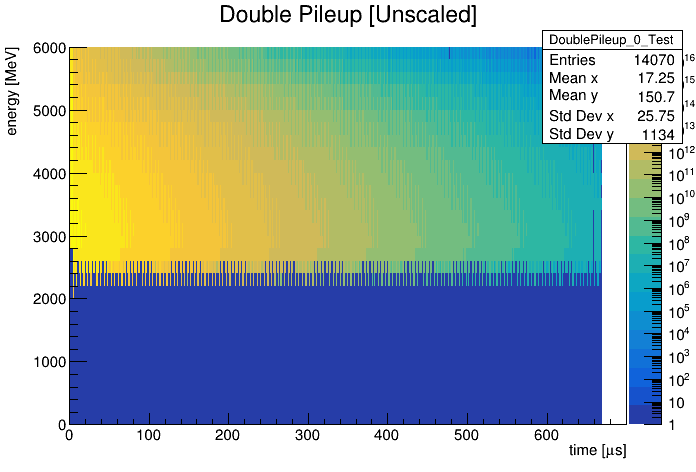

In [12]:
c = r.TCanvas()
corrector.doublePileup.Draw("colz")
c.SetLogz()
c.Draw()

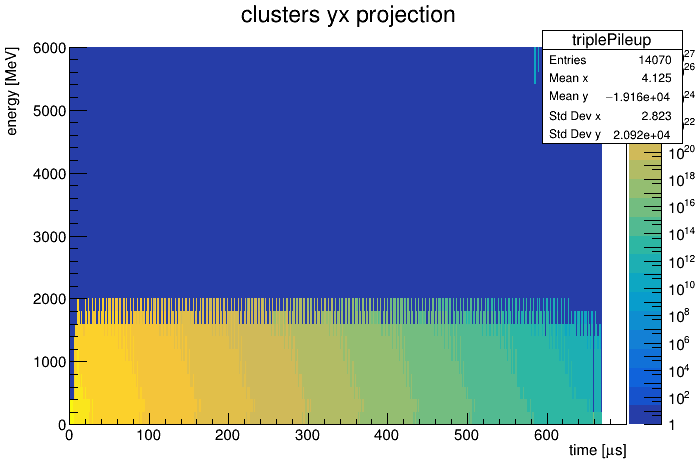

In [13]:
c = r.TCanvas()
corrector.triplePileup.Draw("colz")
c.SetLogz()
c.Draw()

In [14]:
corrector.pileupScaleFactors

[-4.657816425645592e-11, -3.214427728528118e-20]